In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot  as plt
import seaborn as sns
import matplotlib.ticker as mtick 
%matplotlib inline 

In [2]:
#univarite anaylsis
df=pd.read_csv('Churn_Modelling.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df_new=df[['Geography','Gender','Exited']]

In [4]:
df_new

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0
...,...,...,...
9995,France,Male,0
9996,France,Male,0
9997,France,Female,1
9998,Germany,Male,1


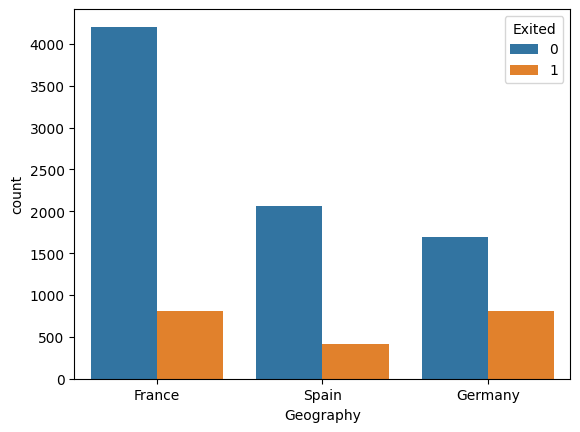

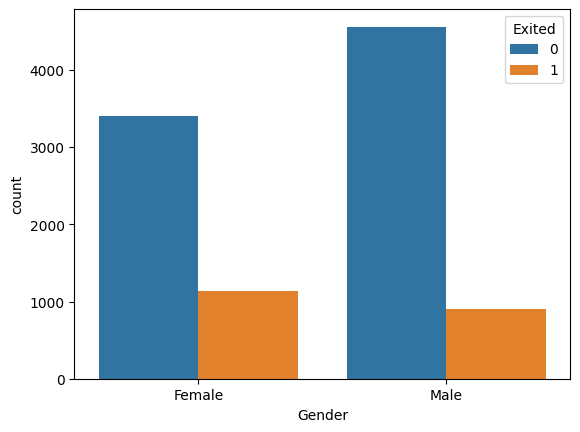

In [5]:
for i, predict in enumerate(df_new.drop(columns=['Exited'])):
    plt.figure()
    sns.countplot(data=df_new, x=predict, hue='Exited')

In [6]:
df_new.value_counts()

Geography  Gender  Exited
France     Male    0         2403
           Female  0         1801
Spain      Male    0         1206
Germany    Male    0          950
Spain      Female  0          858
Germany    Female  0          745
France     Female  1          460
Germany    Female  1          448
           Male    1          366
France     Male    1          350
Spain      Female  1          231
           Male    1          182
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='Count'>

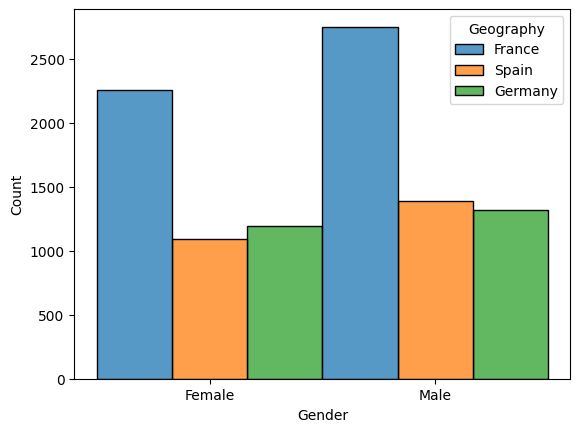

In [7]:
# bivariate anaylsis
sns.histplot(x='Gender',hue='Geography',data=df_new ,stat="count",multiple="dodge")

In [8]:
df_new1=df_new.loc[df_new['Exited']==1]

<Axes: xlabel='Gender', ylabel='Count'>

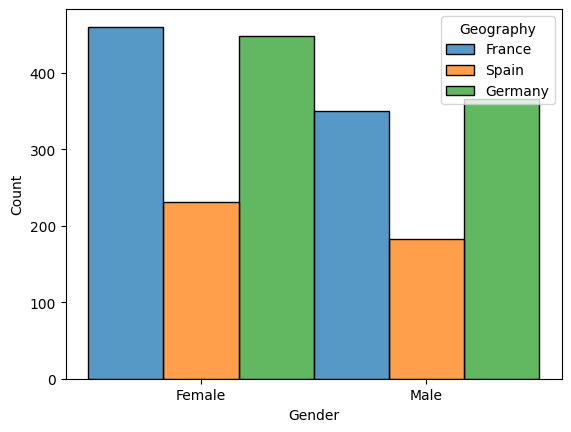

In [9]:
# bivariate anaylsis
sns.histplot(x='Gender',hue='Geography',data=df_new1 ,stat="count",multiple="dodge")

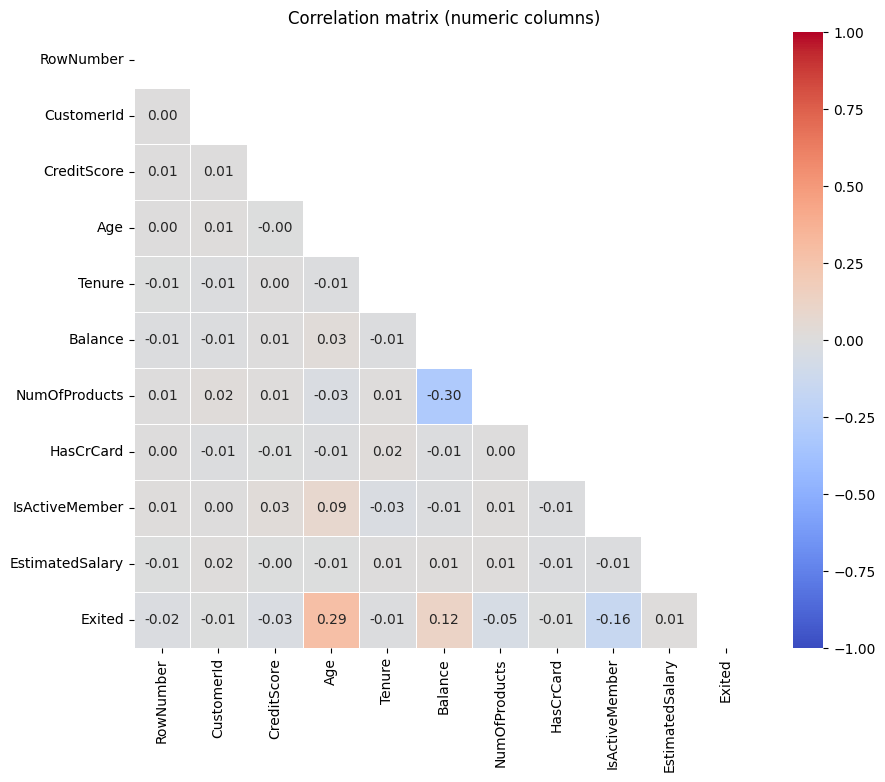

In [14]:
# correlation (numeric columns only)
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Correlation matrix (numeric columns)")
plt.show()